In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import random
import pingouin as pg

from sklearn.model_selection import train_test_split
from matplotlib.ticker import FuncFormatter
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm


# 한글 폰트 실행
from matplotlib import rcParams
from matplotlib import font_manager,rc
rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='NanumGothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/NanumGothic.ttf').get_name()
rc('font',family=font_name)


# 최근접 이웃 알고리즘의 맹점

In [2]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

## train set, test set으로 분리

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

# train set, test set 2차원 배열로 변경
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

train_input.shape

(42, 1)

## 모델 만들기

In [5]:
from sklearn.neighbors import KNeighborsRegressor # 회귀 모델 ==> 수치 예측

knr = KNeighborsRegressor(n_neighbors=3) # 하이퍼파라미터 튜닝
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [6]:
print(knr.predict([[50]]))

[1033.33333333]


## 예측값 결과 시각화

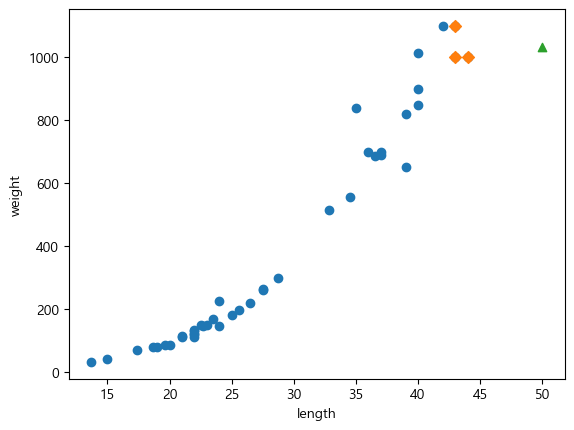

In [8]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구해보자
distances, indexes = knr.kneighbors([[50]])

# train set의 산점도 그리기
plt.scatter(train_input, train_target)
# train set 중에어 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [9]:
print(knr.predict([[100]])) # 1m

[1033.33333333]


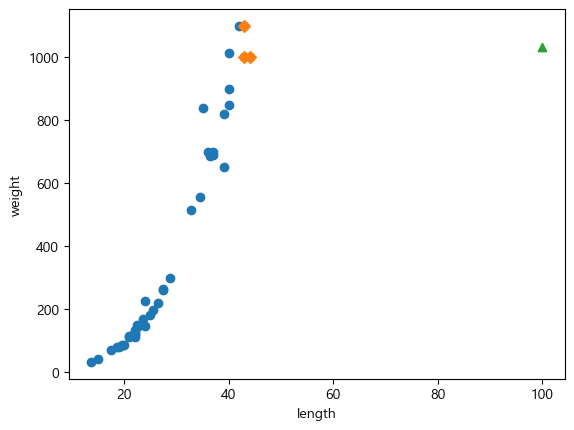

In [10]:
# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 머신러닝 다룰 때 주의점
- 데이터셋 분리 : 분류모델을 진행할 때는 층화추출로 진행
- 스케일링 feature의 단위가 다르면, 하나의 단위로 통일시킴
-- Min-Max 스케일링, Standardization
- 알고리즘에 대한 맹신 금지
-- KNN을 통해서 확인한 것처럼, 알고리즘 특성이 가지고 본연의 단점 있음 ==> 찾아서 대안 마련
-- 단순히, 평가지표만 보고 판단하기 어려움

# 선형회귀
- 미션, 50cm 농어에 대한 예측, 100cm 농어에 대한 예측

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [12]:
# 기울기와 절편
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


[3192.69585141]
x가 15일 때 [-123.7614705]
x가 50일 때 [1241.83860323]


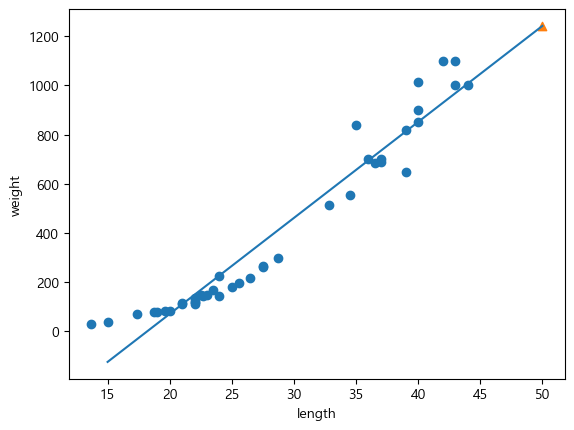

In [13]:
print(lr.predict([[100]])) # 1m

"""
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
"""

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
#                   y = ax + b
print(f'x가 15일 때 {15*lr.coef_+lr.intercept_}')
print(f'x가 50일 때 {50*lr.coef_+lr.intercept_}')
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 모델 평가

In [14]:
lr.score(train_input, train_target) # 훈련세트에 대한 평가

0.9398463339976041

In [15]:
lr.score(test_input, test_target) # 테스트세트에 대한 평가

0.824750312331356

## 모델 선정 못하는 이유
- 길이가 0이상이면, 무게가 음수가 나올수가 없음
- 해결방안 : 1차함수 ==> 2차함수로 변경

# 다항회귀
- $무게 = a * 길이^2 + b * 길이 + c$

In [16]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

train_input.shape, train_poly.shape

((42, 1), (42, 2))

In [17]:
train_poly[0], train_input[0]

(array([384.16,  19.6 ]), array([19.6]))

In [18]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

                  # 길이^2, 길이
print(lr.predict([[50 ** 2,  50]]))

[1573.98423528]


In [19]:
print(lr.coef_, lr.intercept_)

# y = ax^2 + bx + c

[  1.01433211 -21.55792498] 116.0502107827827


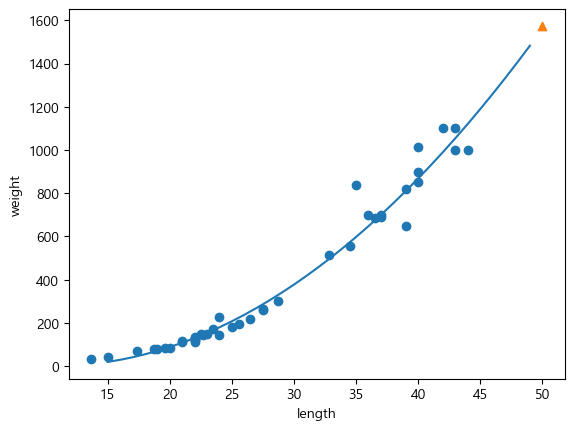

In [20]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 모델 평가

In [21]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


# 결정트리

In [27]:
DATA_PATH = 'c:/Archiving/IMDGB/step08_ML/dataset/'
wine = pd.read_csv(DATA_PATH + "wine.csv")
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


## 데이터셋 확인

In [28]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [29]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


## 탐색적 자료 분석
- 시각화 & 통계 분석
- 데이터의 주요특징 파악
## 독립변수와 종속변수 분리

In [36]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy() # 독립변수
target = wine['class'].to_numpy() # 종속변수

data.shape, target.shape

((6497, 3), (6497,))

## 테스트 셋 분리

In [37]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)

train_input.shape, test_input.shape

((5197, 3), (1300, 3))

## 피처 엔지니어링
- 피처 스케일링: 독립변수 피처들의 단위를 통일 시킴
  - 결정트리에서는 굳이 적용할 필요 없음
  - 일반 선형 모델에는 무조건 적용

In [44]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
# StandardScaler()를 사용해 표준화 객체를 생성합니다.
# 이 객체를 사용해 데이터를 학습(fit)시키고 변환(transform)할 수 있습니다.

ss.fit(train_input)
# fit 메서드를 사용해 훈련 데이터의 평균(mean)과 표준편차(std)를 계산합니다.
# 이 값들은 이후에 데이터를 변환할 때 사용됩니다.
# 계산된 평균과 표준편차는 StandardScaler 객체에 저장

train_scaled = ss.transform(train_input)
# transform 메서드는 fit에서 계산된 평균과 표준편차를 사용해 데이터를 변환합니다.
# 변환된 데이터는 평균이 0이고 표준편차가 1이 됩니다.

test_scaled = ss.transform(test_input)
# 테스트 데이터도 fit된 훈련 데이터의 평균과 표준편차를 사용해 변환됩니다.
# 테스트 데이터에서는 다시 fit하지 않는 것이 중요합니다. 
# 훈련 데이터의 기준에 맞춰야 일관성을 유지할 수 있습니다.

In [42]:
train_input

array([[10.5 ,  7.7 ,  3.19],
       [12.4 ,  2.1 ,  3.26],
       [11.8 ,  2.1 ,  3.41],
       ...,
       [ 9.5 ,  5.6 ,  3.24],
       [ 9.5 ,  8.  ,  3.18],
       [ 9.5 ,  2.7 ,  3.51]])

In [45]:
train_scaled

array([[ 0.01376574,  0.4646116 , -0.16888369],
       [ 1.60871671, -0.70299854,  0.26967864],
       [ 1.10504798, -0.70299854,  1.20945505],
       ...,
       [-0.82568214,  0.0267578 ,  0.14437512],
       [-0.82568214,  0.52716215, -0.23153545],
       [-0.82568214, -0.57789745,  1.83597265]])

## 로지스틱 회귀

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [47]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


### 모델 해석이 어렵다
- 머신러닝 예측, 정확도
- 알콜 도수의 기울기가 0.51, 이것의 정확도는 77%
- 왜 77%야? -> 0.7776923076923077

## 대안으로 결정트리 사용
- 이유 설명하기 쉬움

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


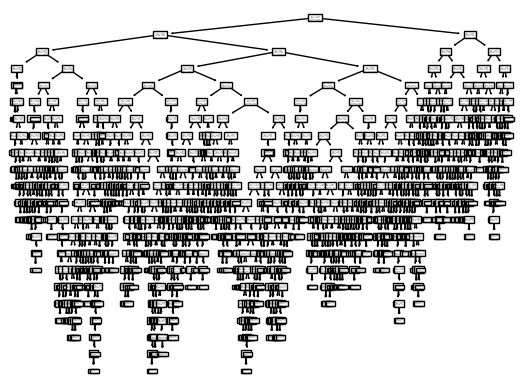

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plot_tree(dt)
plt.show()

- 불순도가 높다 -> 분류 잘 안되고 있음 -> 지니계수 높다
- 불순도가 낮다 -> 분류 잘 되고 있음 -> 지니계수 낮다

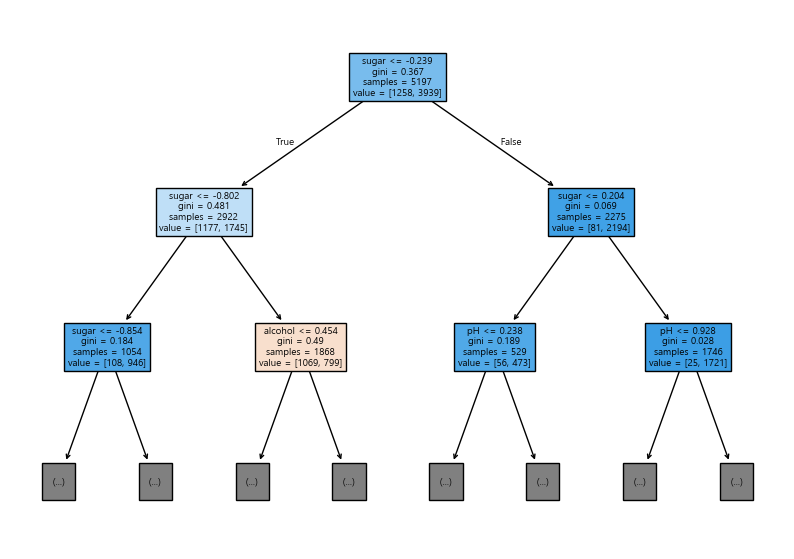

In [52]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=2, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

### 하이퍼파라미터 튜닝
- 가지치기

In [53]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target)) # 훈련데이터, 84.5%
print(dt.score(test_scaled, test_target)) # 테스트데이터, 84.1%

# 기존
# 훈련데이터 : 0.996921300750433
# 테스트데이터 : 0.8584615384615385

0.8672310948624207
0.8607692307692307


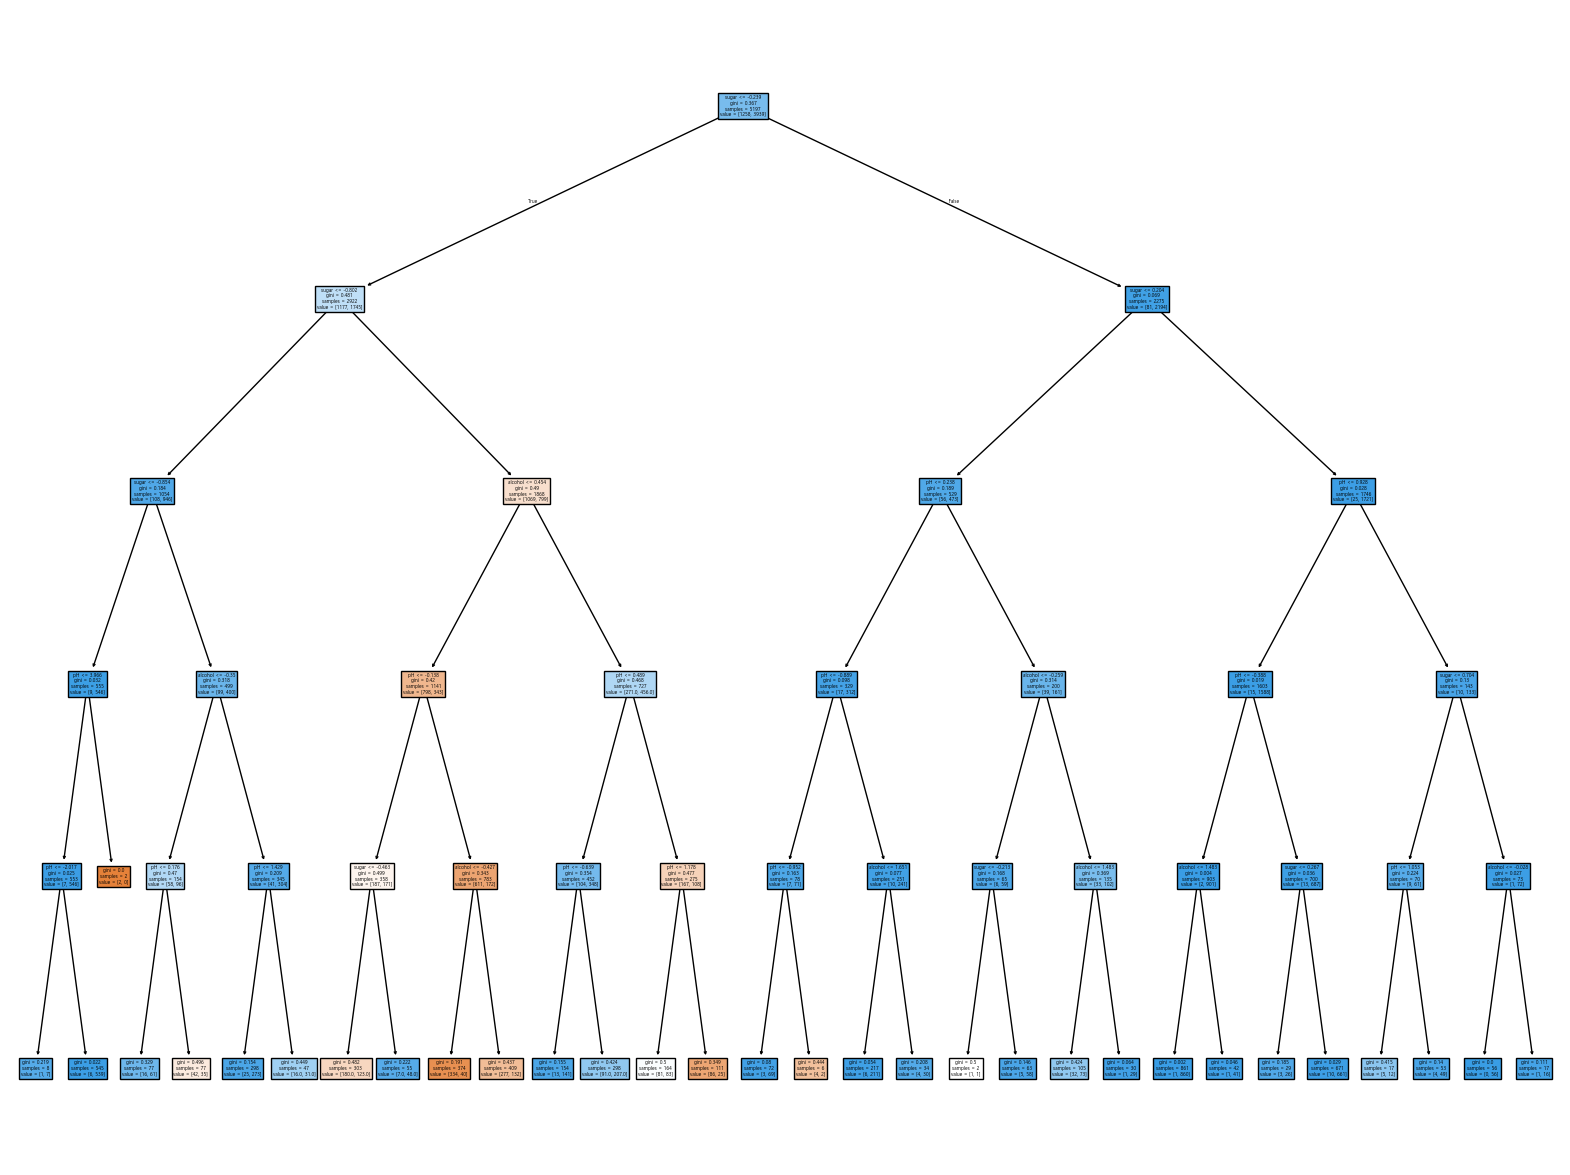

In [54]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# 교차 검증 (Cross Validation)
- 원 데이터에서 훈련 데이터 / 테스트 데이터 분리
- 원 데이터에서 훈련 데이터 / 검증 데이터 / 테스트 데이터 분리
- 축구대표팀
  : 훈련 트레이닝
  : 국내 실업팀과 하는 평가전 ==> 검증
  : 타 국가와 경기하는 평가전 ==> 테스트

## 데이터 불러오기

In [55]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy() # 독립변수
target = wine['class'].to_numpy() # 종속변수

data.shape, target.shape

((6497, 3), (6497,))

## 데이터셋 분리
- 1차, 2차 나눠서 분리
- 1차 분리 : 훈련 데이터와 테스트 데이터 분리
- 2차 분리 : 1차에서 구분된 훈련 데이터 활용해서 다시 훈련데이터와 검증 데이터로 분리

In [56]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)

sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

# 훈련           검증             테스트
sub_input.shape, val_input.shape, test_input.shape

((4157, 3), (1040, 3), (1300, 3))

## 베이스라인 모델
- 기본모델

In [57]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target)) # 훈련 데이터
print(dt.score(val_input, val_target)) # 검증 데이터

0.9971133028626413
0.864423076923077


## 교차 검증
- 축구대표팀 : 국내 여러팀과 더 경기를 해서 최적의 전략을 찾아야 함
- 1차 검증 => 점수
- 2차 검증 => 점수
- 3차 검증 => 점수
- 위 1-3차 검증 결과의 점수 평균 내서 최종적으로 산출

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
scores